In [3]:
import pandas as pd
import numpy as np
import os

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt

In [4]:
dataset_directory = "../Datasets/"

# Loading Subject Embeddings

This dataset already contains the manual labels in the `label` feature.

In [13]:
vec = pd.read_csv(os.path.join(dataset_directory, "NEW_vectorized_folders_df.csv"), index_col=0)
print(vec.shape)
vec.head()

(1747, 302)


,subject,0,1,2,3,4,5,6,7,8,...,291,292,293,294,295,296,297,298,299,label
0,sent,-0.017090,0.021729,0.225586,-0.129883,-0.199219,-0.107910,-0.184570,-0.083984,0.004974,...,-0.283203,-0.051758,0.112305,0.267578,0.059082,0.144531,-0.091309,-0.069824,-0.021606,1
1,documents,0.097656,0.063965,0.024658,-0.151367,-0.032471,0.110352,0.044678,0.195312,0.089844,...,-0.245117,-0.113770,0.026367,-0.156250,0.119141,0.073730,-0.292969,-0.035889,0.032959,1
2,contacts,0.074219,0.001274,0.065918,-0.086914,-0.070801,0.249023,-0.320312,-0.174805,0.091797,...,0.097656,0.023071,-0.063965,0.114258,0.015869,0.416016,-0.140625,-0.050537,-0.033447,1
3,deleted,-0.172852,-0.047852,0.316406,0.145508,-0.220703,0.009521,-0.028076,0.216797,0.507812,...,0.076660,0.363281,-0.200195,0.287109,-0.263672,0.196289,-0.361328,-0.050537,-0.070801,1
4,discussion,-0.039062,0.042236,0.014465,0.115234,0.132812,-0.101074,0.164062,-0.100098,0.123535,...,-0.175781,0.326172,0.152344,0.042236,-0.011536,-0.125000,-0.229492,-0.112305,-0.158203,1


Let us just drop everything except the embedding for us to visualize a couple of points in 2-D by performing dimensionality reduction.

In [14]:
vec = vec.drop(labels=['subject', 'label'], axis=1)
vec.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,-0.017090,0.021729,0.225586,-0.129883,-0.199219,-0.107910,-0.184570,-0.083984,0.004974,0.111328,...,-0.148438,-0.283203,-0.051758,0.112305,0.267578,0.059082,0.144531,-0.091309,-0.069824,-0.021606
1,0.097656,0.063965,0.024658,-0.151367,-0.032471,0.110352,0.044678,0.195312,0.089844,-0.285156,...,0.099121,-0.245117,-0.113770,0.026367,-0.156250,0.119141,0.073730,-0.292969,-0.035889,0.032959
2,0.074219,0.001274,0.065918,-0.086914,-0.070801,0.249023,-0.320312,-0.174805,0.091797,-0.052734,...,0.022583,0.097656,0.023071,-0.063965,0.114258,0.015869,0.416016,-0.140625,-0.050537,-0.033447
3,-0.172852,-0.047852,0.316406,0.145508,-0.220703,0.009521,-0.028076,0.216797,0.507812,0.092285,...,0.181641,0.076660,0.363281,-0.200195,0.287109,-0.263672,0.196289,-0.361328,-0.050537,-0.070801
4,-0.039062,0.042236,0.014465,0.115234,0.132812,-0.101074,0.164062,-0.100098,0.123535,0.005585,...,-0.011292,-0.175781,0.326172,0.152344,0.042236,-0.011536,-0.125000,-0.229492,-0.112305,-0.158203


# Dimensionality Reduction

Let us perform dimensionality reduction using PCA followed by TSNE on the first 200 datapoints.

In [15]:
labels = []
count = 0
max_count = 200 # THE NUMBER OF POINTS WE WANT TO VISUALIZE
X = np.zeros(shape=(max_count, len(vec['1'])))

for row in vec:
    X[count] = vec[row]
    labels.append(row)
    count = count + 1
    if count >= max_count: 
        break

# You can vary the number of components 
pca = PCA(n_components=40)
X_40 = pca.fit_transform(X)

visual_tsne = TSNE(n_components=2, random_state=0)
Y = visual_tsne.fit_transform(X_40)

# Visualizing Embeddings in 2D

In [18]:
# Let us re-read the same csv to get the names and labels for each of the points
labels = pd.read_csv(os.path.join(dataset_directory, 'NEW_vectorized_folders_df.csv'), index_col=0, nrows=max_count)
names = labels['subject']
labels = labels['label']

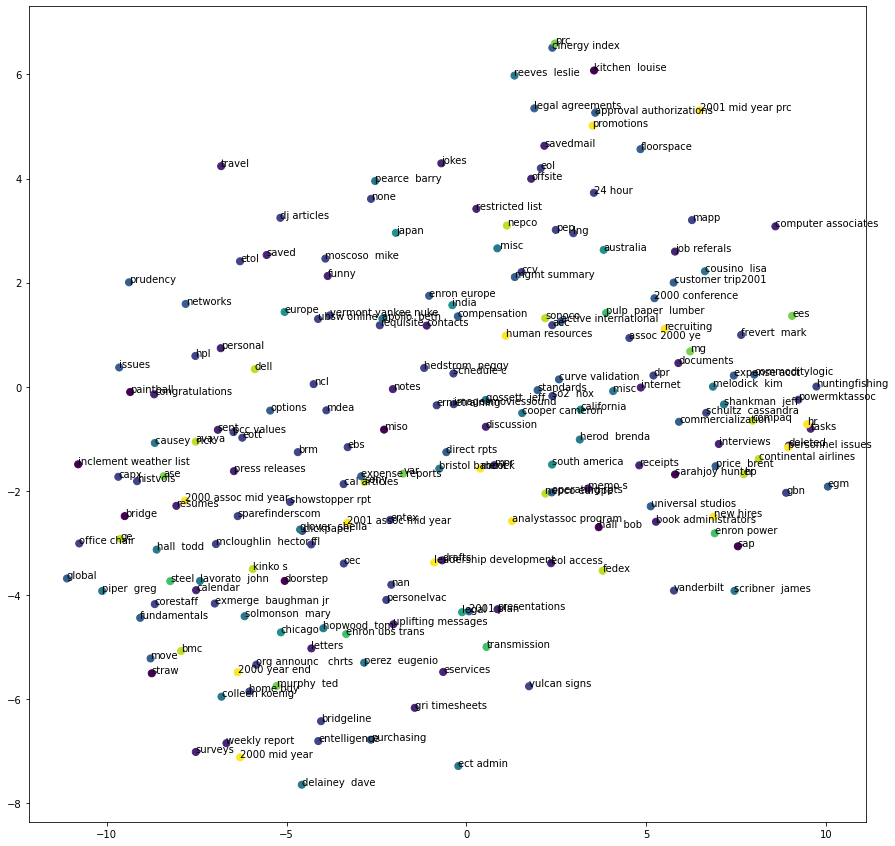

In [20]:
plt.figure(figsize=(15, 15)) 
plt.scatter(Y[:, 0], Y[:, 1], c=labels, s=50)

# Add labels
for label, x, y in zip(names, Y[:, 0], Y[:, 1]):
    plt.annotate(label, xy = (x,y), xytext = (0, 0), textcoords = 'offset points', size = 10)

plt.savefig('../Figures/PCA_200.png', dpi=300, bbox_inches='tight')
plt.show()